# 연속데이터예측_아이오와에임스지역_집값예측_train

In [129]:
import pandas as pd
import numpy as np

In [130]:
pd.set_option('display.max_columns', 100)

In [125]:
data = pd.read_csv('./data/house_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 출력층 : Dense(1)
- model.compile(loss='mean_squared_error', metrics='mse')

In [127]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [128]:
# data.info()

### 결측치 처리 

In [134]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
Heating         0.000000
Id              0.000000
ExterCond       0.000000
Length: 81, dtype: float64

In [11]:
# 결측치 처리
data_isna = data.isna().sum() / len(data) * 100
data_isna[data_isna > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [135]:
# 결측치가 전체 데이터의 30% 이상인 경우 컬럼 제거
## Alley(도로접근유형), MasVnrType(외장 벽 마감재 유형), FireplaceQu(벽난로 품질)
## PoolQC(수영장 품질), Fence(울타리 품질), MiscFeature(기타 기능)

data = data.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [137]:
data_isna = data.isna().sum() / len(data) * 100
print(data_isna[data_isna > 0])

data_isna = data[data_isna[data_isna > 0].index]
# data_isna.info()

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In [84]:
# 결측치 처리 위한 수치/범주형 컬럼 분리
data_isna_obj = data_isna.select_dtypes(include='object')
data_isna_num = data_isna.select_dtypes(exclude='object')

In [35]:
# !pip install koreanize-matplotlib

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [85]:
data_isna_obj.isna().sum() / len(data) * 100

Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [86]:
# 범주형은 2~5% 정도의 결측치 비율만 가지고 있으므로 최빈값 대치 진행

for col in data_isna_obj:
#     print(col, ':', data[col].nunique())
    print()
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode, inplace=False)
    print(f'{col}의 결측값: ', data[col].isna().sum())
    
print('최빈값으로 대치되었습니다!')


Alley의 결측값:  0

MasVnrType의 결측값:  0

BsmtQual의 결측값:  0

BsmtCond의 결측값:  0

BsmtExposure의 결측값:  0

BsmtFinType1의 결측값:  0

BsmtFinType2의 결측값:  0

Electrical의 결측값:  0

FireplaceQu의 결측값:  0

GarageType의 결측값:  0

GarageFinish의 결측값:  0

GarageQual의 결측값:  0

GarageCond의 결측값:  0

PoolQC의 결측값:  0

Fence의 결측값:  0

MiscFeature의 결측값:  0
최빈값으로 대치되었습니다!


In [87]:
# 수치형 컬럼 확인
data_isna_num.isna().sum() / len(data) * 100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [88]:
data_isna_num.describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [89]:
# 인근지역 기준으로 평균 면적을 거리와 접한 면적(LotFrontage) 대치
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [90]:
data['LotFrontage'].isna().sum()

0

In [99]:
# MasVnrArea: 외장 벽 마감재 면적 (평방 피트)
# 0.54 퍼센트의 결측치를 가지고 있음 -> 중앙값, 최빈값 = 0
# 중앙값(0) 대치
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

In [100]:
data['MasVnrArea'].isna().sum()

0

In [109]:
# GarageYrBlt: 차고 건축 연도
# Grage 관련 컬럼들이 NA인 경우는 0으로 처리
# GarageType, GarageArea(0)없는 경우 -> 데이터 없음(0)

len(data[(data['GarageType'].isna()) & (data['GarageYrBlt'].isna()) & (data['GarageArea']==0)])

0

In [111]:
# 차고는 보통 집을 지으면서 같이 짓는 경우가 대부분
# YearBuilt: 건축 연도
# 건축 연도와 동일하게 대치
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['YearBuilt'])

In [112]:
data['GarageYrBlt'].isna().sum()

0

In [116]:
# 전체 컬럼에서 결측치 확인
# 결측치 처리 완료
data_isna = data.isna().sum() / len(data) * 100
data_isna[data_isna > 0]

Series([], dtype: float64)

### 이상치 처리

In [121]:
# 수치형 컬럼만 분리
num_cols = data.select_dtypes(exclude='object')
len(num_cols.columns)

38

============================== Id ==============================

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64



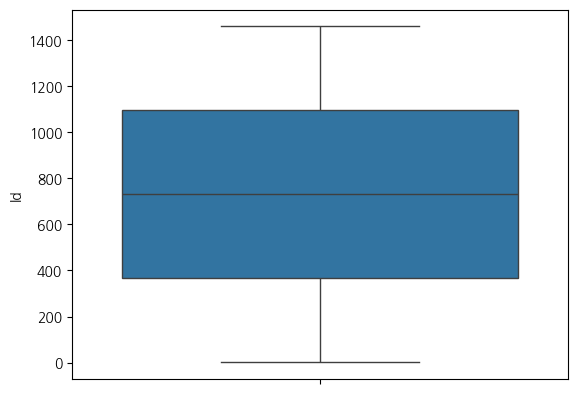

============================== MSSubClass ==============================

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64



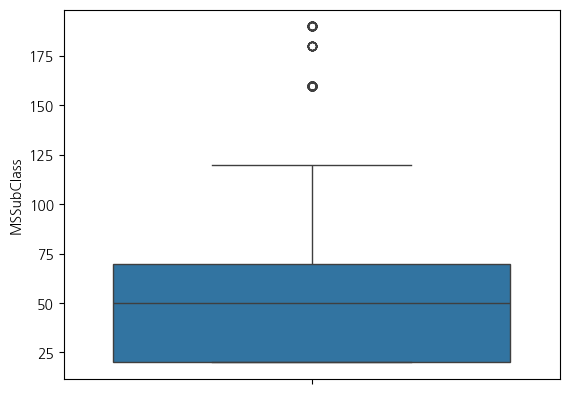

============================== LotFrontage ==============================

count    1460.000000
mean       70.725218
std        22.426978
min        21.000000
25%        60.000000
50%        70.083333
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64



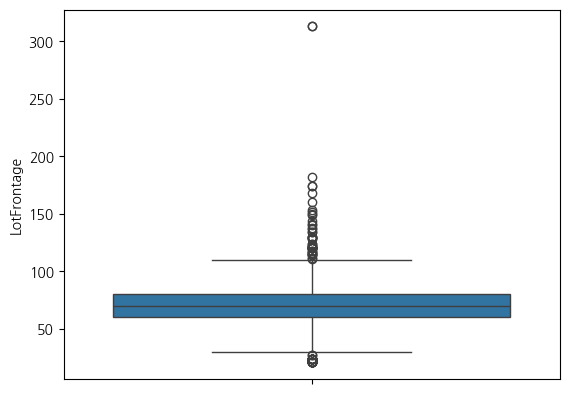

============================== LotArea ==============================

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64



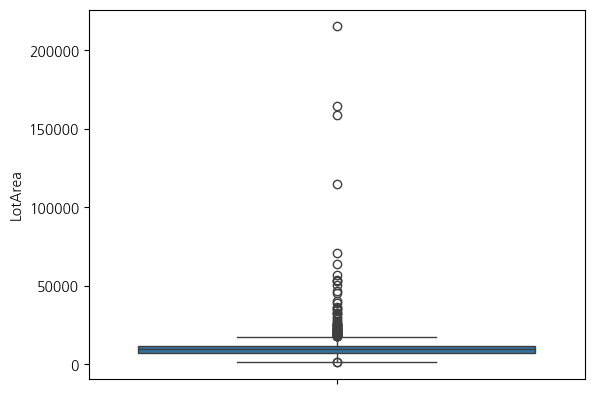

============================== OverallQual ==============================

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64



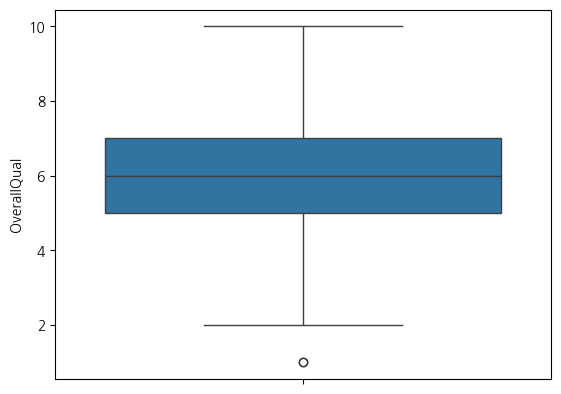

============================== OverallCond ==============================

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64



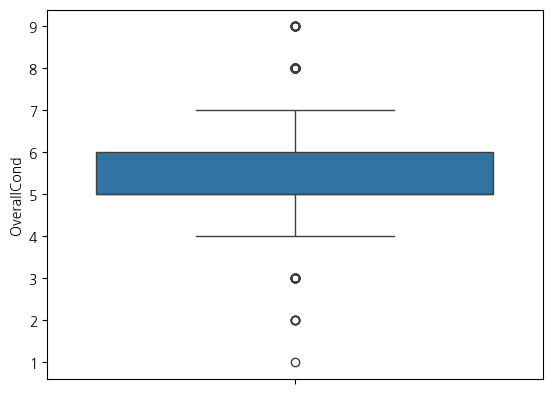

============================== YearBuilt ==============================

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64



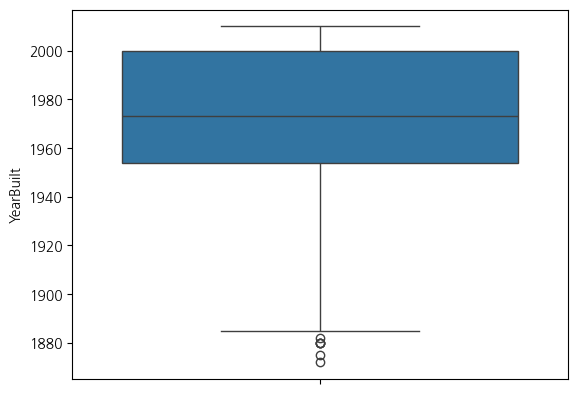

============================== YearRemodAdd ==============================

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64



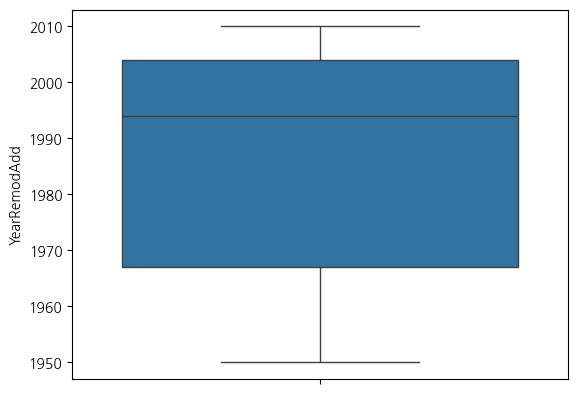

============================== MasVnrArea ==============================

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64



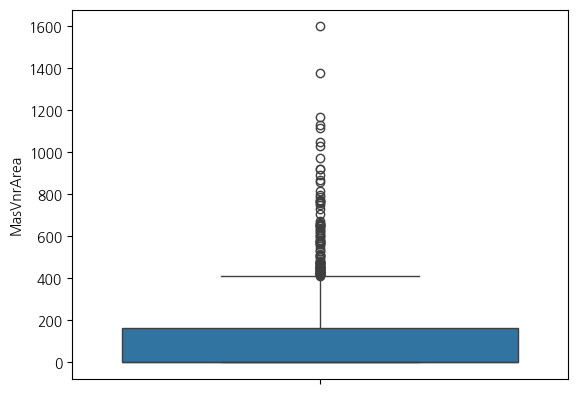

============================== BsmtFinSF1 ==============================

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64



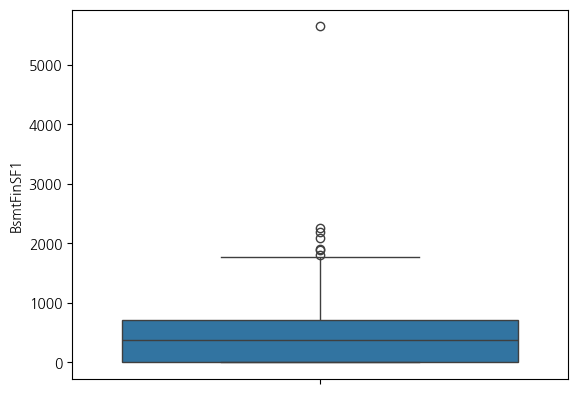

============================== BsmtFinSF2 ==============================

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64



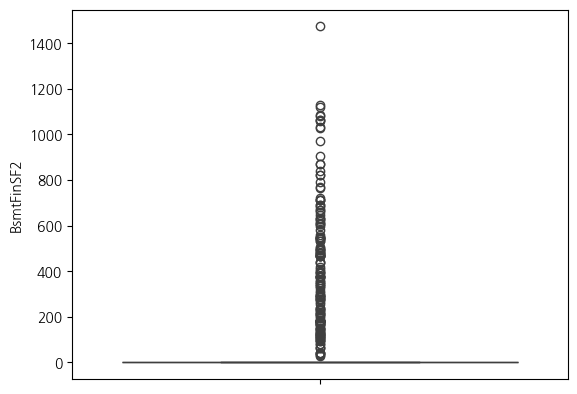

============================== BsmtUnfSF ==============================

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64



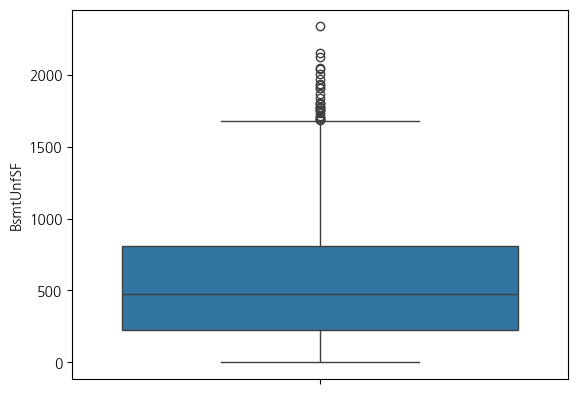

============================== TotalBsmtSF ==============================

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64



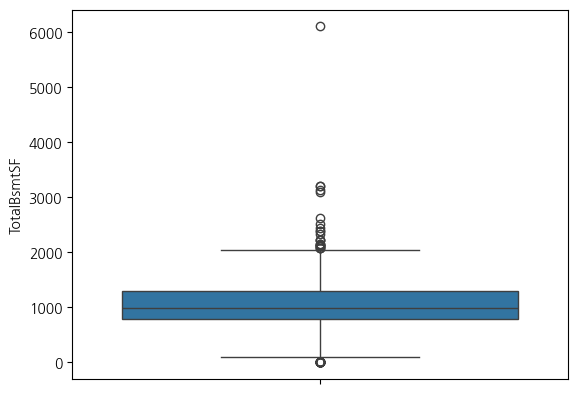

============================== 1stFlrSF ==============================

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64



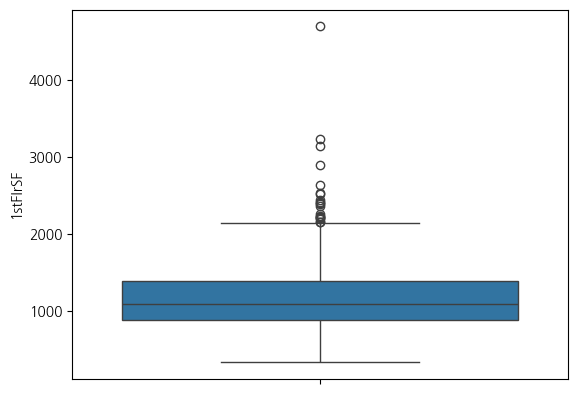

============================== 2ndFlrSF ==============================

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64



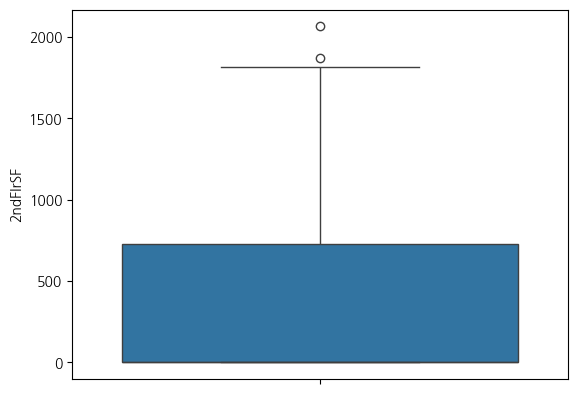

============================== LowQualFinSF ==============================

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64



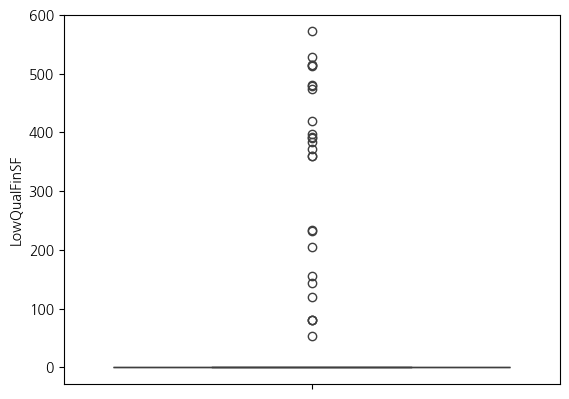

============================== GrLivArea ==============================

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64



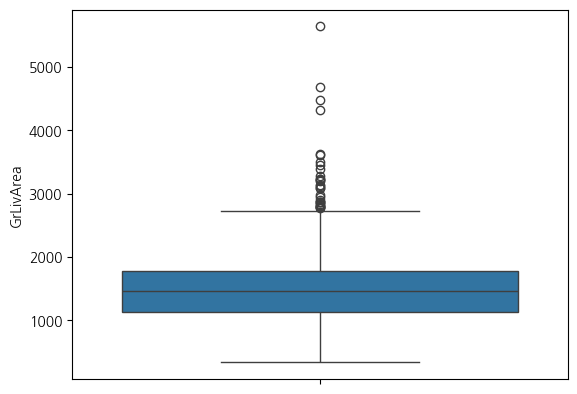

============================== BsmtFullBath ==============================

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64



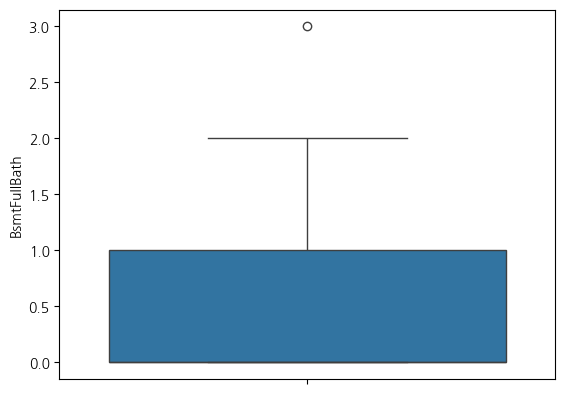

============================== BsmtHalfBath ==============================

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64



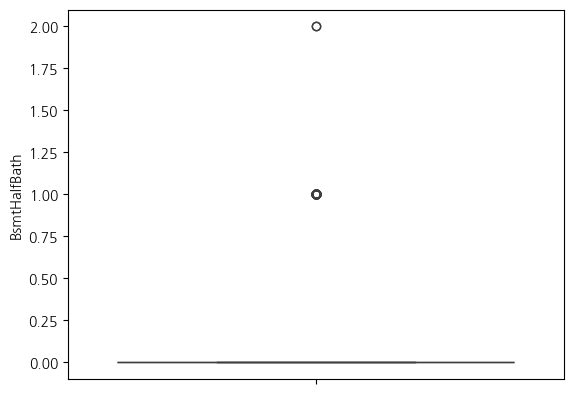

============================== FullBath ==============================

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64



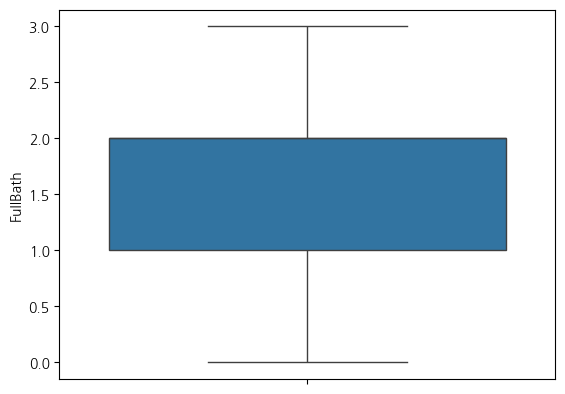

============================== HalfBath ==============================

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64



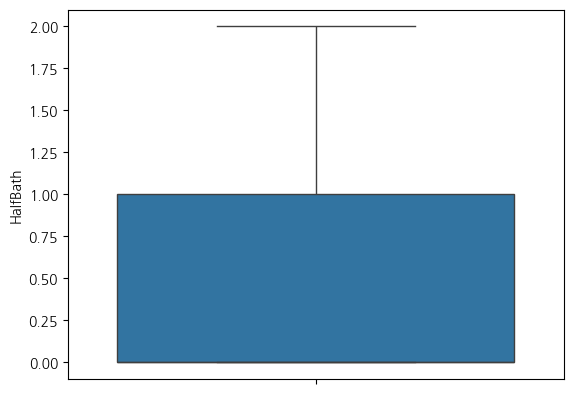

============================== BedroomAbvGr ==============================

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64



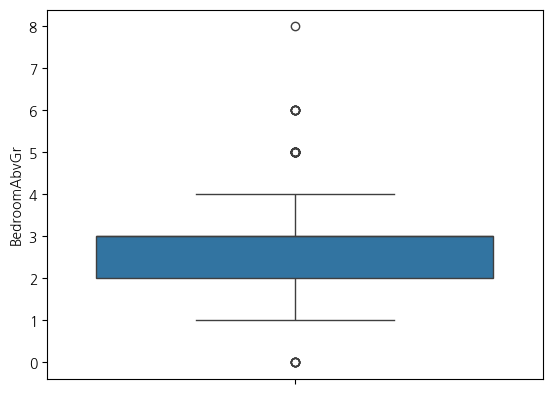

============================== KitchenAbvGr ==============================

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64



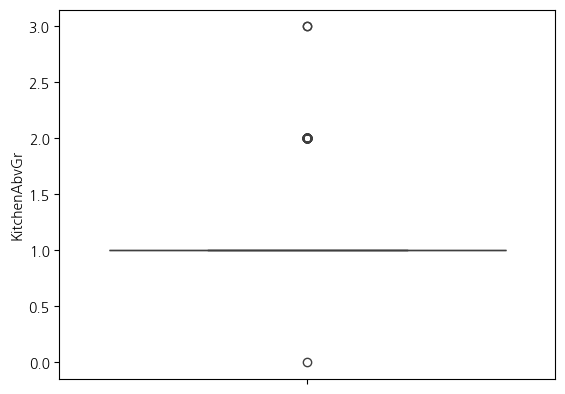

============================== TotRmsAbvGrd ==============================

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64



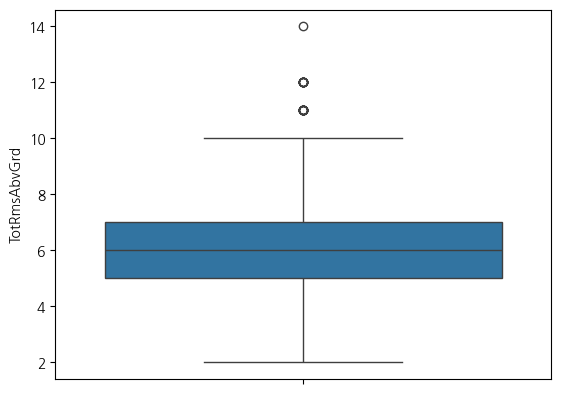

============================== Fireplaces ==============================

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64



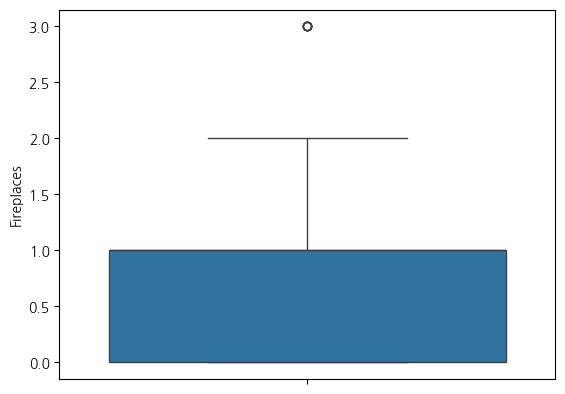

============================== GarageYrBlt ==============================

count    1460.000000
mean     1976.507534
std        26.306739
min      1872.000000
25%      1959.000000
50%      1978.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64



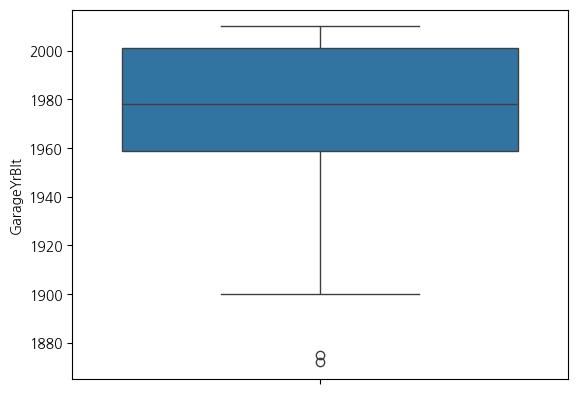

============================== GarageCars ==============================

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64



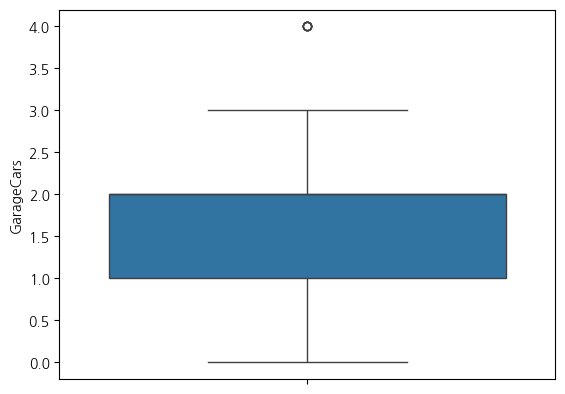

============================== GarageArea ==============================

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64



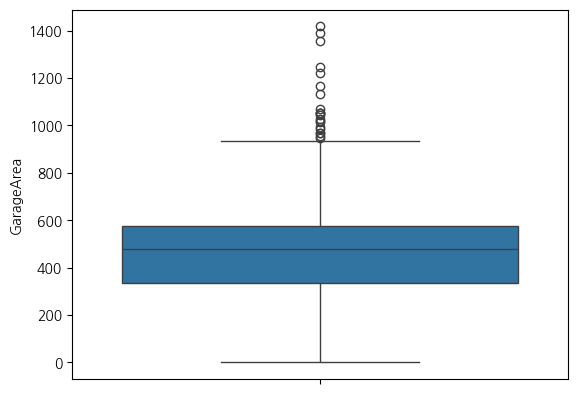

============================== WoodDeckSF ==============================

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64



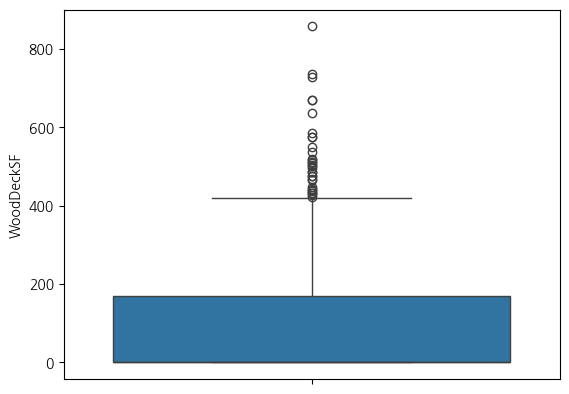

============================== OpenPorchSF ==============================

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64



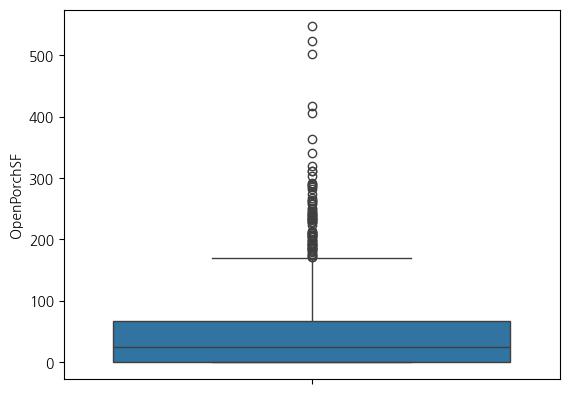

============================== EnclosedPorch ==============================

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64



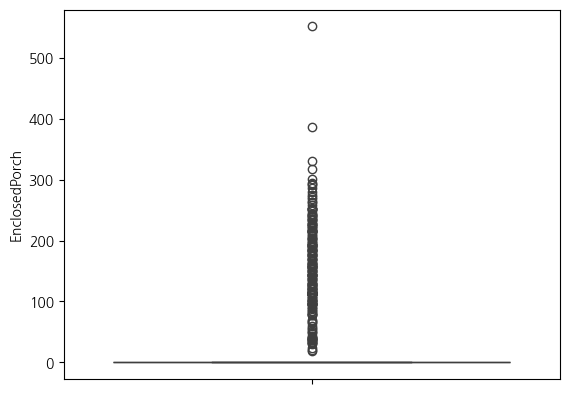

============================== 3SsnPorch ==============================

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64



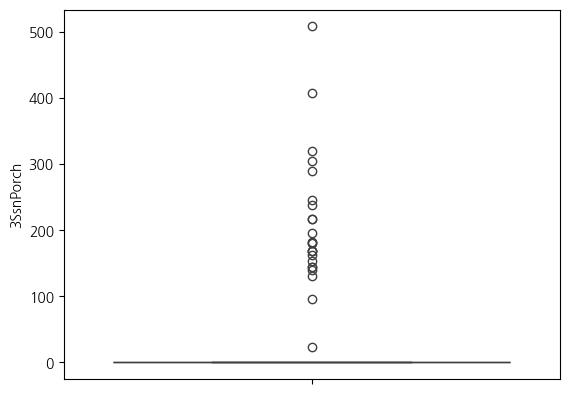

============================== ScreenPorch ==============================

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64



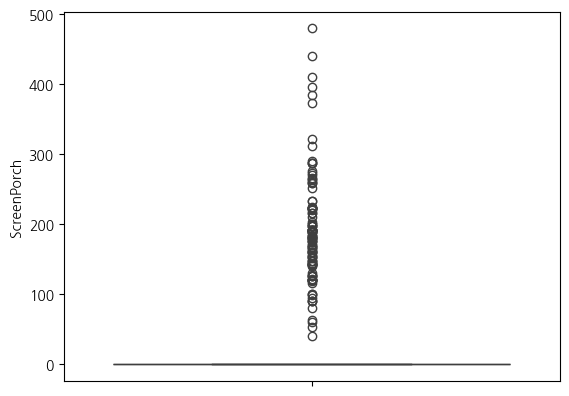

============================== PoolArea ==============================

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64



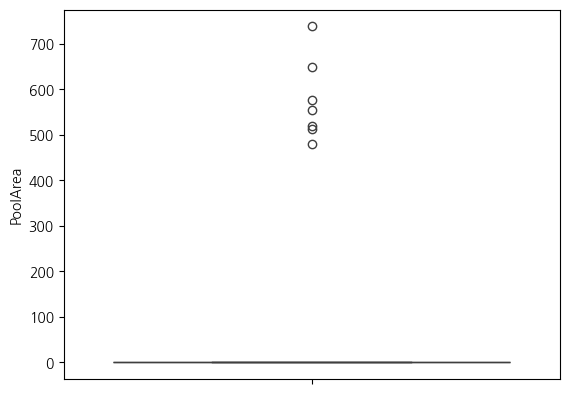

============================== MiscVal ==============================

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64



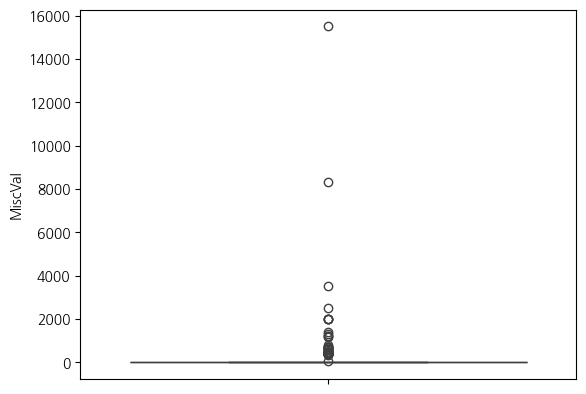

============================== MoSold ==============================

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64



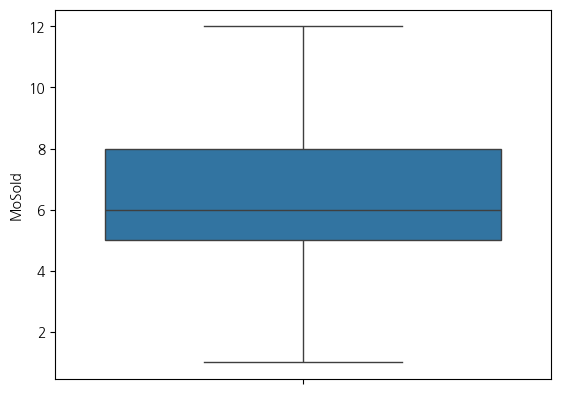

============================== YrSold ==============================

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64



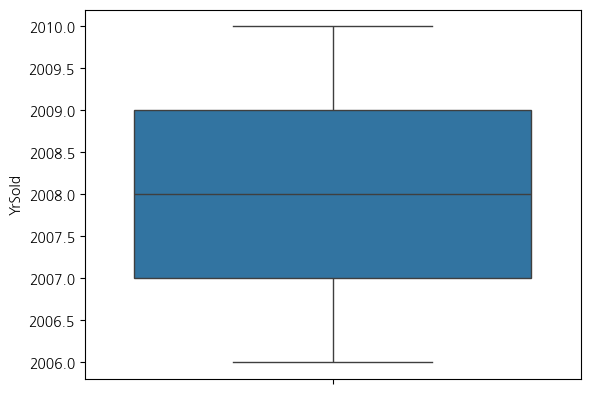

============================== SalePrice ==============================

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64



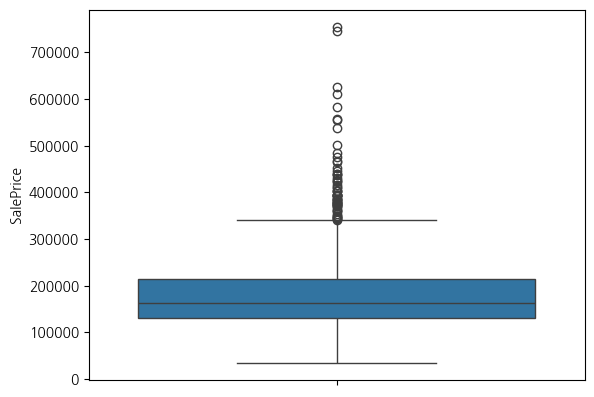

In [124]:
for col in num_cols:
    print('='*30, col, '='*30)
    print()
    print(data[col].describe(), end='\n\n')

    sns.boxplot(data[col])
    plt.show()

In [ ]:
# LotFrontage : 주택 유형(190층에 산다?) : 높은 위치에 사는 사람 있을 수 있음 -> 이상치 X
# LotFrontage : 거리와 접한 면적 (피트 단위) : 도로 접한 폭이 넓은 면적에 사는 사람 있을 수 있음 -> 이상치 X
# LotArea : 부지 면적 (평방 피트) : 넓은 면적에 사는 사람이 있을 수 있음 -> 이상치 X
# OverallQual : 전체 재료 및 마감 품질 (1~10 등급) -> 이상치 X
# OverallCond : 전체 상태 (1~10 등급) -> 이상치 X
# YearBuilt : 건축 연도
# MasVnrArea
# BsmtFinSF1
# BsmtFinSF2
# BsmtUnfSF
# TotalBsmtSF
# 1stFlrSF
# 2ndFlrSF
# LowQualFinSF
# GrLivArea
# BsmtFullBath


